In [ ]:
# 타깃 마케팅...
# 온라인 판매 데이터를 분석 타깃 마케팅이 필요한 소비자 군집을 구성
# 비지도학습, 군집화, k-평균, 엘보우 방법, 실루엣 방법
# UCI Machin Learning Repository 에서 다운로드
# 비지도학습
# - 타깃이 주어지지 않은상태에서 학습
# - 훈련데이터를 학습->모델생성->유사한 특성(관계, 패턴)을 가지는 데이터로 클러스터를 구성
# - 새로운 데이터의 특성을 분석하여 해당 클러스터를 예측
# k-평균
# 유클리디안 거리 알고리즘을 이용  평균거리가 작은쪽으로 계속 중심점을 이동
# 엘보방법
#  - 왜곡 : 클러스터의 중심점과 클러스터내의 데이터 거리 차이의 제곱값의 합
#  - 클러스터의 개수 k의 변화에 따른 왜곡의 변화를 그래프로 그려보면 그래프가 꺽이는 지점이
#     엘보.... 그 곳을 최적의 k로 선택
# 실루엣 분석
#  - 클러스터내의 데이터가 얼마나 조밀하게 모여있는지 측정하는 그래프 도구
#  - 데이터 i가 해당 클러스터내의 데이터와 얼마나 가까운가를 나타내는 응집력 a(i)
#  - 가장 가까운 다른 클러스터내의 데이터와 얼마나 떨어져 있는가를
#    나타내는 클러스터 분리도b(i)를 이용
#  - 실루엣  계수 s(i)를 계산
#  -  -1에서 1상이의 값을 가지며 1에 가까울수록 좋은 군집화
#  - s(i) =  ( b(i) - a(i) ) / max(a(i),b(i))

In [2]:
# nvoiceNo: 6자리 정수로 이루어진 송장 번호. ‘C’로 시작하는 것은 취소 주문 
# StockCode: 제품 고유의 품목 코드 
# Description: 제품 설명 
# Quantity: 주문 수량
# Country: 주문 고객의 국적
# InvoiceDate: 주문 날짜와 시간 
# UnitPrice: 제품 단가(£, 영국 파운드화)
# CustomerID: 주문 고객 번호 

In [3]:
import pandas as pd
import math

In [5]:
!pip install openpyxl

In [61]:
retail_df =  pd.read_excel('D:/ML/Online_Retail.xlsx') # 개인 경로
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [62]:
retail_df.shape

(541909, 8)

In [63]:
# 데이터 준비 및 탐색
# 데이터 정제하기 - 데이터 확인
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [64]:
retail_df = retail_df[retail_df['CustomerID'].notnull()]

In [65]:
sum(retail_df['Quantity']<0)

8905

In [66]:
retail_df = retail_df[retail_df['Quantity']>0]

In [67]:
sum(retail_df['UnitPrice']<0)

0

In [68]:
sum(retail_df['Quantity']<0)

0

In [69]:
sum(retail_df['CustomerID'].isna())

0

In [70]:
# customerId가 정수형태로 변환  DataFrame.astype(int)
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [71]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int32         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [72]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [108]:
# 중복 데이터 확인
#list(retail_df.columns)
#retail_df.columns.tolist()
temp = retail_df.groupby(['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID']).count() > 1
temp
# retail_df.groupby(['InvoiceNo','StockCode']).count()

Country
InvoiceNo StockCode Description                         Quantity InvoiceDate         UnitPrice CustomerID         
536365    21730     GLASS STAR FROSTED T-LIGHT HOLDER   6        2010-12-01 08:26:00 4.25      17850         False
          22752     SET 7 BABUSHKA NESTING BOXES        2        2010-12-01 08:26:00 7.65      17850         False
          71053     WHITE METAL LANTERN                 6        2010-12-01 08:26:00 3.39      17850         False
          84029E    RED WOOLLY HOTTIE WHITE HEART.      6        2010-12-01 08:26:00 3.39      17850         False
          84029G    KNITTED UNION FLAG HOT WATER BOTTLE 6        2010-12-01 08:26:00 3.39      17850         False
...                                                                                                            ...
581587    22730     ALARM CLOCK BAKELIKE IVORY          4        2011-12-09 12:50:00 3.75      12680         False
          22899     CHILDREN'S APRON DOLLY GIRL         6        2011-12-09 12:50:00 2.10      12680         False
          23254     CHILDRENS CUTLERY DOLLY GIRL        4        2011-12-09 12:50:00 4.15      12680         False
          23255     CHILDRENS CUTLERY CIRCUS PARADE     4        2011-12-09 12:50:00 4.15      12680         False
          23256     CHILDRENS CUTLERY SPACEBOY          4        2011-12-09 12:50:00 4.15      12680         False

[392732 rows x 1 columns]

In [109]:
# 중복 레코드 제거
print(retail_df.shape)
retail_df.drop_duplicates(inplace=True)
print(retail_df.shape)

(397924, 8)
(392732, 8)


In [110]:
# 제품의  수(Product), 거래건수(Transaction), 고객 수(Customer) 
retail_df['StockCode'].value_counts()
retail_df['InvoiceNo'].value_counts()
retail_df['CustomerID'].value_counts()

pd.DataFrame({
    'Product':[len(retail_df['StockCode'].value_counts())],
    'Transaction':[len(retail_df['InvoiceNo'].value_counts())],
    'Customer' : [len(retail_df['CustomerID'].value_counts())]
},index = ['counts'])

# d = {
#     'Product': [3665], 
#     'Transaction': [18536]
# }
# df = pd.DataFrame(data=d)
# df   

,Product,Transaction,Customer
counts,3665,18536,4339


In [111]:
retail_df['Country'].value_counts()

United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [112]:
# 분석용 데이터 생성
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [113]:
# 주문 금액 추가 SaleAmount
retail_df['SaleAmount']  = retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [121]:
# 마케팅에 이용하려면.. 고객의 주문 횟수, 주문 총액, 마지막 주문후 며칠이 지났는지
# retail_df.groupby('CustomerID')['InvoiceNo'].count()
# retail_df.groupby('CustomerID')['SaleAmount'].sum()
customer_df =  retail_df.groupby('CustomerID').agg({
    'InvoiceNo':'count',
    'SaleAmount':'sum',
    'InvoiceDate':'max'
})
customer_df = customer_df.reset_index()
customer_df.head()

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [123]:
#customer_df.columns = ['CustomerID','Freq','SaleAmount','ElapsedDays']
customer_df = customer_df.rename(columns={
    'InvoiceNo':'Freq',
    'InvoiceDate':'ElapsedDays'
})
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [130]:
# 마지막 주문일로부터 며칠이 지났는지에 대한 값을 ElapsedDays 컬럼에 저장
import datetime
datetime.datetime.today()
datetime.datetime.today().year

2022

In [132]:
# 기준 날자를 2011 12 31로 정해
customer_df['ElapsedDays'] = datetime.datetime(2011,12,31) - customer_df['ElapsedDays']

In [133]:
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,346 days 13:59:00
1,12347,182,4310.00,23 days 08:08:00
2,12348,31,1797.24,96 days 10:47:00
3,12349,73,1757.55,39 days 14:09:00
4,12350,17,334.40,331 days 07:59:00


In [136]:
customer_df['ElapsedDays'][0].days+1

347

In [139]:
# def customF(x):
#     return x.day+1
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days+1)
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,347
1,12347,182,4310.00,24
2,12348,31,1797.24,97
3,12349,73,1757.55,40
4,12350,17,334.40,332


In [140]:
# 데이터의 치우침 정도를 보기위해 boxplot을 사용
import matplotlib.pyplot as plt
import seaborn as sns

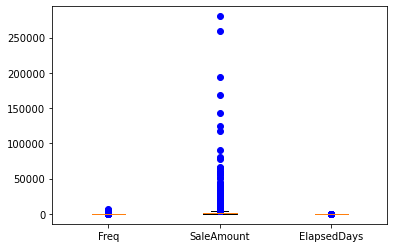

In [147]:
fig,ax =  plt.subplots()
ax.boxplot( [customer_df['Freq'],customer_df['SaleAmount'],customer_df['ElapsedDays']], sym='bo')
plt.xticks([1,2,3],['Freq','SaleAmount','ElapsedDays'])
plt.show()

In [148]:
# 각 컬럼에 대해서 log함수를 이용해서 값의 분포를 고르게 조정(StandardSacle과 유사)
import numpy as np
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,347,0.693147,11.253955,5.852202
1,12347,182,4310.00,24,5.209486,8.368925,3.218876
2,12348,31,1797.24,97,3.465736,7.494564,4.584967
3,12349,73,1757.55,40,4.304065,7.472245,3.713572
4,12350,17,334.40,332,2.890372,5.815324,5.808142


In [149]:
# 시각화를 위해서 데이터 조정이 필요하면... np.log1p() 적용해서 시각화 한다.
# 학습을 위한 데이터 조정이 필요하면 SandardScale을 적용한다. 

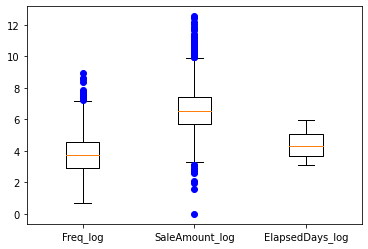

In [150]:
fig,ax =  plt.subplots()
ax.boxplot( [customer_df['Freq_log'],customer_df['SaleAmount_log'],customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1,2,3],['Freq_log','SaleAmount_log','ElapsedDays_log'])
plt.show()

In [151]:
# k-평균 군집화 모델
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [157]:
x_feature = customer_df.iloc[:,-3:].values

In [158]:
from sklearn.preprocessing import StandardScaler
x_feature_scaled= StandardScaler().fit_transform(x_feature)

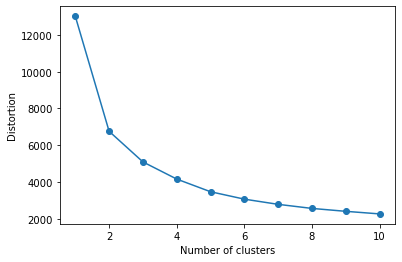

In [161]:
# k-평균 군집화 모델을 이용
# 엘보 방법을 이용해서 군집의 갯수를 선택
Distortion = []  # 왜곡
for i in range(1,11):  # 1  ~ 10
    kmeans_i =  KMeans(n_clusters=i, random_state=0)  # 모델 생성
    kmeans_i.fit(x_feature_scaled)
    Distortion.append(kmeans_i.inertia_)  # 왜곡 값을 저장
    
plt.plot(range(1,11),Distortion, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

In [162]:
# 클러스터의 개수 k를 3으로 설정해서 k-평균 모델을 다시 구축한뒤에 모델에서 만든 클러스터 레이블을 확인한다
kmeans =  KMeans(n_clusters=3, random_state=0)
# 모델의 학습과 결과예측(클러스터 레이블 생성)
y_predict =  kmeans.fit_predict(x_feature_scaled)

In [163]:
customer_df['clusterLable'] = y_predict
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,clusterLable
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,2
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,0
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,1
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,0
4,12350,17,334.40,332,2.890372,5.815324,5.808142,2


In [164]:
# 각 클러스터의 비중을 가로바 차트로 시각화
from matplotlib import cm

In [168]:
def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)

    silhouette_values = silhouette_samples(X_features, Y_labels, metric = 'euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes, height = 1.0, edgecolor = 'none', color = color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
    plt.title('Number of Cluster : '+ str(n_cluster) + '\n' + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()
        

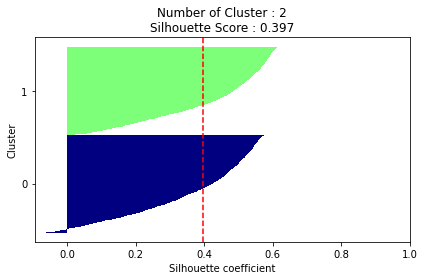

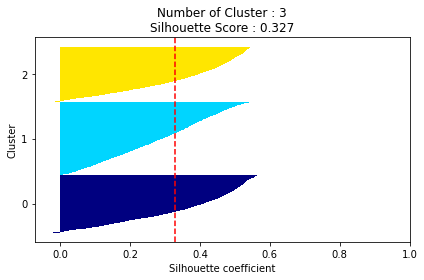

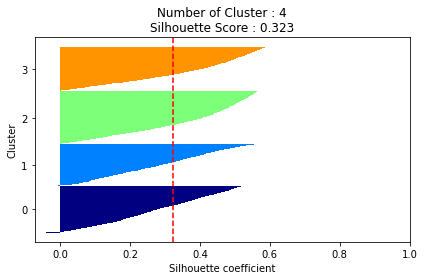

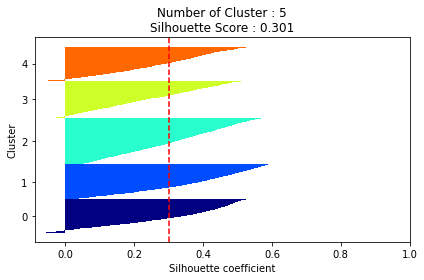

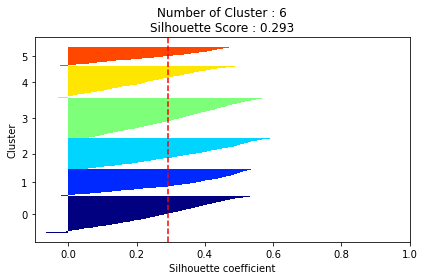

In [186]:
silhouetteViz(2,x_feature_scaled)
silhouetteViz(3,x_feature_scaled)
silhouetteViz(4,x_feature_scaled)
silhouetteViz(5,x_feature_scaled)
silhouetteViz(6,x_feature_scaled)

In [182]:
# 클러스터 분포
def clusterScatter(n_cluster, X_features):
    c_colors = []
    kmeans = KMeans(n_clusters = n_cluster, random_state = 0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1], marker = 'o', color =  c_color, edgecolor = 'black', s = 50, label = 'cluster '+ str(i))

    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], marker = '^', color = c_colors[i], edgecolor = 'w', s = 200)
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()


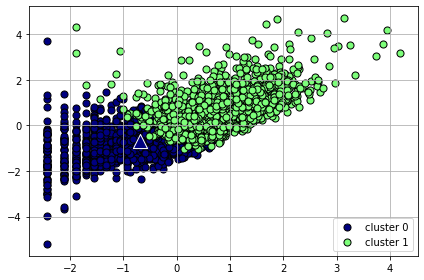

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


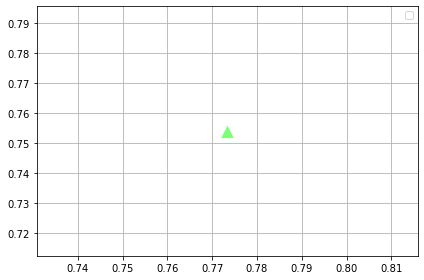

In [187]:
clusterScatter(2,x_feature_scaled)

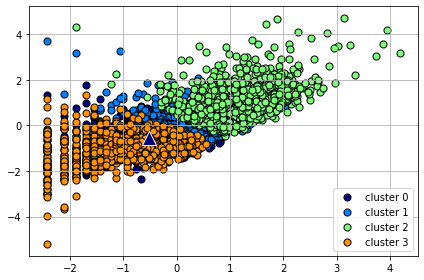

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


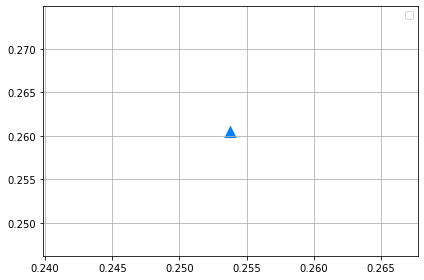

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


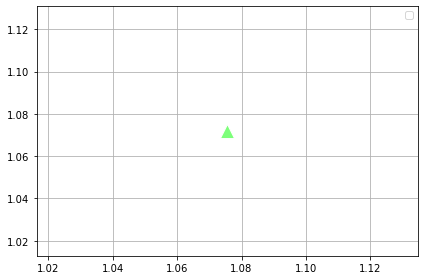

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


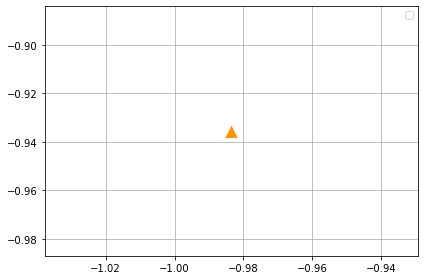

In [178]:
clusterScatter(4,x_feature_scaled)

In [188]:
#  클러스터를 2개로 재 조정
bset_cluster = 2
kmeans =  KMeans(n_clusters=bset_cluster, random_state=0)
y_predict =  kmeans.fit_predict(x_feature_scaled)

In [193]:
customer_df['clusterLable'] = y_predict
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,clusterLable
0,12346,1,77183.60,347,0.693147,11.253955,5.852202,0
1,12347,182,4310.00,24,5.209486,8.368925,3.218876,1
2,12348,31,1797.24,97,3.465736,7.494564,4.584967,1
3,12349,73,1757.55,40,4.304065,7.472245,3.713572,1
4,12350,17,334.40,332,2.890372,5.815324,5.808142,0


In [ ]:
# DataFrame을 파일로 저장 
customer_df.to_csv('D:/ML/customer_cluster.csv')

In [192]:
# 소비자 군집이 완성
customer_df.groupby('clusterLable')['CustomerID'].count()

clusterLable
0    2282
1    2057
Name: CustomerID, dtype: int64

In [ ]:
# 클러스터별로 고객의 구매빈도와 마지막 구매일이후 얼마나 경과... 등등.. 각종 통계
# 각 클러스터의 특징을 파악해서 마켓팅에 활용
# 주의..... 2개 최상.... 마게팅에 활용을 하려면... 좀더 구분하는게 좋지 않을까?